In [128]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [129]:
hpi = pd.DataFrame(pd.read_csv('hpi_final.csv'))
cpb = pd.DataFrame(pd.read_csv('cpb_final.csv'))
bps = pd.DataFrame(pd.read_csv('building_permits_final.csv'))
pop = pd.DataFrame(pd.read_csv('../../../../House_Value_Predict_Project3/Population_Change.csv'))
inc = pd.DataFrame(pd.read_csv('../../../../House_Value_Predict_Project3/county_income.csv'))

In [130]:
pop = pop[['Id2', 'year','one_year', 'two_years', 'three_years', 'four_years', 'five_years']]

pop.one_year = pop.one_year.shift(-1)
pop.two_years = pop.two_years.shift(-2)
pop.three_years = pop.three_years.shift(-3)
pop.four_years = pop.four_years.shift(-4)
pop.five_years = pop.five_years.shift(-5)
pop = pop.rename(columns = {
    'Id2': 'county_code',
    'one_year': 'one_year_pop',
    'two_years': 'two_years_pop',
    'three_years': 'three_years_pop',
    'four_years': 'four_years_pop',
    'five_years': 'five_years_pop'
})

In [161]:
inc = inc[['county_code', 'year', 'hh_income']]

gb = inc.groupby(['county_code', 'year']).mean()


def percent_change(gb):
    gb['one_year_inc']=gb['hh_income'].pct_change(periods=1).shift(-1)
    gb['two_years_inc']=gb['hh_income'].pct_change(periods=2).shift(-2)
    gb['three_years_inc']=gb['hh_income'].pct_change(periods=3).shift(-3)
    gb['four_years_inc']=gb['hh_income'].pct_change(periods=4).shift(-4)
    gb['five_years_inc']=gb['hh_income'].pct_change(periods=5).shift(-5)
    
    return gb

inc = gb.groupby(level=0).apply(percent_change)

inc.head()

hh_income  one_year_inc  two_years_inc  three_years_inc  \
county_code year                                                            
1001        2007      18275      0.005363       0.000711         0.078960   
            2008      18373     -0.004626       0.073205         0.088445   
            2009      18288      0.078193       0.093504         0.090004   
            2010      19718      0.014200       0.010954         0.017902   
            2011      19998     -0.003200       0.003650         0.015302   

                  four_years_inc  five_years_inc  
county_code year                                  
1001        2007        0.094282        0.090780  
            2008        0.084962        0.092418  
            2009        0.097496        0.110236  
            2010        0.029719        0.034385  
            2011        0.019902        0.040104

In [131]:
hpi = hpi[['county', 'year', 'hpi','one_year', 'two_years', 'three_years',
       'four_years', 'five_years'
          ]]
bps = bps[['date', 'county_code', 'single_units', 'total_units']]
cpb = cpb[['county_code', 'year', 'EMP', 'ESTAB', 'PAYANN',
           'one_year_emp',
       'two_years_emp', 'three_years_emp', 'four_years_emp', 'five_years_emp',
       'one_year_estab', 'two_years_estab', 'three_years_estab',
       'four_years_estab', 'five_years_estab', 'one_year_pay', 'two_years_pay',
       'three_years_pay', 'four_years_pay', 'five_years_pay'
          ]]
hpi.rename(columns={'county': 'county_code'}, inplace=True)
bps.rename(columns={'date': 'year'}, inplace=True)

In [162]:
df = pd.merge(hpi, cpb, how='inner', on=['county_code', 'year'])

df1 = pd.merge(df, bps, how='inner', on=['county_code', 'year'])

df2 = pd.merge(df1, pop, how='inner', on = ['county_code', 'year'])

df3 = pd.merge(df2, inc.reset_index(), how="inner", on = ['county_code', 'year'])

In [163]:
df3 = df3.replace([np.inf, -np.inf], np.nan)
df3 = df3.dropna()

C:\Users\nilay\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


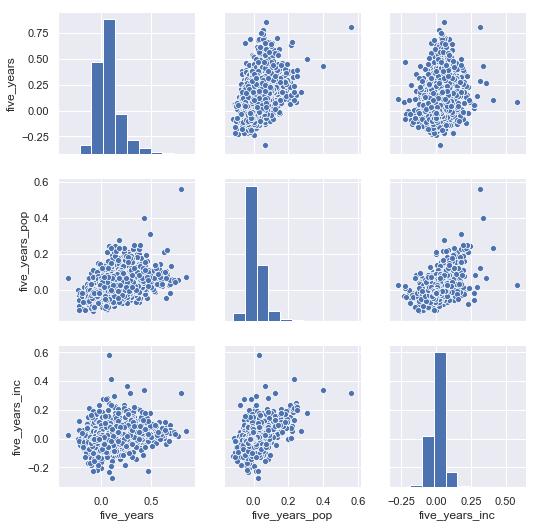

In [170]:
sns.set()
cols = ['five_years','five_years_pop', 'five_years_inc']
sns.pairplot(df3[cols], size = 2.5)
plt.show();

In [204]:
X = df3[[
    'EMP', 'ESTAB', 'PAYANN', 'single_units', 'total_units',
    'one_year_emp', 'two_years_emp', 'three_years_emp', 'four_years_emp', 'five_years_emp',
       'one_year_estab', 'two_years_estab', 'three_years_estab',
       'four_years_estab', 'five_years_estab', 'one_year_pay', 'two_years_pay',
       'three_years_pay', 'four_years_pay', 'five_years_pay',
         'one_year_pop', 'one_year_inc', 'two_years_inc',
    'three_years_inc','four_years_inc','five_years_inc',
        'two_years_pop', 'three_years_pop', 'four_years_pop',
    'five_years_pop', 'hh_income']].values

l = [1.14383044e+01 5.14469879e+00 3.81888392e+00 2.50210240e+00
 1.82401920e+00 1.28582056e+00 9.11751486e-01 6.39934740e-01
 5.87864763e-01 4.69710199e-01 4.35471351e-01 3.46161050e-01
 2.63954143e-01 2.04374344e-01 1.99134938e-01 1.86972212e-01
 1.54114624e-01 1.00453651e-01 9.14101373e-02 7.14516724e-02
 6.29874665e-02 5.26596066e-02 5.01520236e-02 4.87752355e-02
 3.42196138e-02 3.16975608e-02 2.16271517e-02 1.27987425e-02
 1.15001740e-02 4.56579480e-03 5.24164182e-04]

y = df3[['five_years']].values

print(X.shape, y.shape)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

(5107, 31) (5107, 1)


In [205]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [206]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [176]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [177]:
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [178]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
print(f"MSE: {MSE}, R2: {r2}")


MSE: 0.6642948011859445, R2: 0.32209614405402565


In [179]:
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.6822357790307556, R2: 0.30378761892523376


In [180]:
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.6643071315305596, R2: 0.32208356110418956


In [181]:
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.6817801034122153, R2: 0.3042526297281447


In [101]:
from sklearn import linear_model
from sklearn import svm

classifiers = [
    svm.SVR(),
#     linear_model.SGDRegressor(),
    linear_model.BayesianRidge(),
#     linear_model.LassoLars(),
    linear_model.ARDRegression(),
#     linear_model.PassiveAggressiveRegressor(),
#     linear_model.TheilSenRegressor(),
    linear_model.LinearRegression()]

for item in classifiers:
    print(item)
    clf = item
    clf.fit(X_train_scaled, y_train_scaled)
    r2 = clf.score(X_test_scaled, y_test_scaled)
    print(f'r2 score: {r2}')
    print('----------------------------------------------------------------------')

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


C:\Users\nilay\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


r2 score: 0.36717907084600354
----------------------------------------------------------------------
BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)
r2 score: 0.30411232236200014
----------------------------------------------------------------------
ARDRegression(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, threshold_lambda=10000.0, tol=0.001, verbose=False)


C:\Users\nilay\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\nilay\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


r2 score: 0.3127540978934856
----------------------------------------------------------------------
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
r2 score: 0.312106298827289
----------------------------------------------------------------------


In [224]:
from sklearn.decomposition import PCA
pca = PCA(n_components=31)
pca.fit(X_train_scaled)
print(pca.)
print('-----------------------------------------')
print(pca.explained_variance_)

[-11.12225732 -48.29113674 -13.26830094 ...  -7.38860164 -12.16886764
 -12.19526762]
-----------------------------------------
[1.14383044e+01 5.14469879e+00 3.81888392e+00 2.50210240e+00
 1.82401920e+00 1.28582056e+00 9.11751486e-01 6.39934740e-01
 5.87864763e-01 4.69710199e-01 4.35471351e-01 3.46161050e-01
 2.63954143e-01 2.04374344e-01 1.99134938e-01 1.86972212e-01
 1.54114624e-01 1.00453651e-01 9.14101373e-02 7.14516724e-02
 6.29874665e-02 5.26596066e-02 5.01520236e-02 4.87752355e-02
 3.42196138e-02 3.16975608e-02 2.16271517e-02 1.27987425e-02
 1.15001740e-02 4.56579480e-03 5.24164182e-04]


In [217]:
pca = PCA(n_components=5)
pca.fit(X_train_scaled)
X_pca = pca.transform(X_train_scaled)
print("original shape:   ", X_train_scaled.shape)
print("transformed shape:", X_pca.shape)

original shape:    (3830, 31)
transformed shape: (3830, 5)


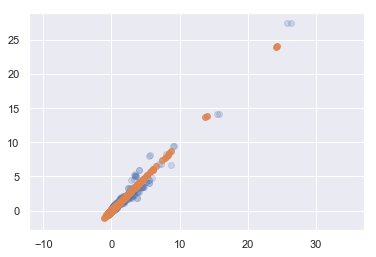

In [218]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0],X_new[:, 1], alpha=0.8)
plt.axis('equal');

In [225]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=31)
Y_sklearn = sklearn_pca.fit_transform(X_train_scaled)

In [230]:
pca = sklearn_pca.fit(X_train_scaled)
print("")
print('-----------------------------------------')
print(pca.explained_variance_)


-----------------------------------------
[1.14383044e+01 5.14469879e+00 3.81888392e+00 2.50210240e+00
 1.82401920e+00 1.28582056e+00 9.11751486e-01 6.39934740e-01
 5.87864763e-01 4.69710199e-01 4.35471351e-01 3.46161050e-01
 2.63954143e-01 2.04374344e-01 1.99134938e-01 1.86972212e-01
 1.54114624e-01 1.00453651e-01 9.14101373e-02 7.14516724e-02
 6.29874665e-02 5.26596066e-02 5.01520236e-02 4.87752355e-02
 3.42196138e-02 3.16975608e-02 2.16271517e-02 1.27987425e-02
 1.15001740e-02 4.56579480e-03 5.24164182e-04]
